## Stanford Cars Dataset division into multifolder files

### Import dependencies

In [1]:
%config Completer.use_jedi = False
import tensorflow as tf
import numpy as np
import scipy as sp
import scipy.io
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image
import csv

### Load images

In [9]:
def load_images(folder):
    images = []
    for i in range(1, len(os.listdir(folder)) + 1):
        filename = format(i, '06d') + '.jpg'
        img = cv2.imread(os.path.join(folder,filename))
        # OpenCV loads images to BGR by default (modify this to RGB)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if img is not None:
            images.append(img)
    return images

In [10]:
car_images = np.array(load_images('car_ims/'), dtype=object)

### Load annotation file

In [22]:
annotation_file = sp.io.loadmat('cars_annos.mat')
img_labels = annotation_file.get('annotations')[0]
labels = annotation_file.get('class_names')[0]

### 16185 images from 196 car models

In [5]:
print(img_labels.shape)
print(labels.shape)

(16185,)
(196,)


### Information variables

In [8]:
names = np.array([img_labels[i][0][0] for i in range(len(img_labels))])
top_left_x = np.array([img_labels[i][1][0][0] for i in range(len(img_labels))])
top_left_y = np.array([img_labels[i][2][0][0] for i in range(len(img_labels))])
bot_right_x = np.array([img_labels[i][3][0][0] for i in range(len(img_labels))])
bot_right_y = np.array([img_labels[i][4][0][0] for i in range(len(img_labels))])
car_class = np.array([img_labels[i][5][0][0] for i in range(len(img_labels))])
car_test = np.array([img_labels[i][6][0][0] for i in range(len(img_labels))])

### Random example visualization

['BMW M5 Sedan 2010']


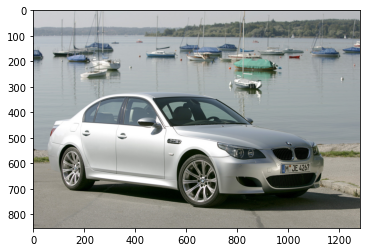

In [26]:
idx = np.random.randint(0, len(car_images))
plt.imshow(car_images[idx])
print(labels[car_class[idx]-1])

## Create multifolder division

### Create folders

In [54]:
os.makedirs('dataset/')
os.chdir('/home/alvaro/siamese/dataset/')
for each in labels:
    os.makedirs(each[0])

In [69]:
print(names[0])
print(top_left_x[0])
print(top_left_y[0])
print(bot_right_x[0])
print(bot_right_y[0])
print(car_class[0])
print(car_test[0])

car_ims/000001.jpg
112
7
853
717
1
0


### Create files names

In [11]:
img_filenames = [names[i].split('/')[-1] for i in range(len(names))]
csv_filenames = [names[i].split('/')[-1].split('.')[0] + '.csv' for i in range(len(names))]

### Dump images and save information to folders

In [16]:
for i in range(len(car_images)):
    row = [top_left_x[i], top_left_y[i], bot_right_x[i], bot_right_y[i], car_class[i], car_test[i]]
    os.chdir(labels[car_class[i]-1][0] if labels[car_class[i]-1][0] != 'Ram C/V Cargo Van Minivan 2012' else 'Ram CV Cargo Van Minivan 2012')
    cv2.imwrite(img_filenames[i], cv2.cvtColor(car_images[i], cv2.COLOR_RGB2BGR))
    with open(csv_filenames[i], 'w') as file:
        writer = csv.writer(file)
        writer.writerow(row)
        file.close()
    os.chdir('../')